## Import common Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D

## Load example data

In [2]:
df = pd.read_csv("data/aircraft.csv", index_col=0)
df = df.sort_values("max_weight")

train_acs = "A320,A343,A359,A388,B737,B744,B748,B752,B763,B773,B789,C550,E145,E190"
train_acs = train_acs.split(",")

df_train = df.query("index in @train_acs")
df_test = df.query("index not in @train_acs")

X_train = df_train[["length", "width"]].values
y_train = df_train["wing_area"].values

X_test = df_test[["length", "width"]].values
y_test = df_test["wing_area"].values

## Gradient descent

**Important**: Gradient descent does not guarantee a global minima.

<img src="https://i.imgur.com/sEAiauO.gif" width=1000px style="margin:auto"/>

## Gradient descent for linear regression
Recall the following linear equation:

$$
\begin{bmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & \dots & x_{1m}\\
1 & x_{21} &  \dots & x_{2m}\\
\vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & \dots & x_{nm}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_0 \\ \epsilon_1 \\ \vdots \\ \epsilon_n
\end{bmatrix}
$$

Let us write it as:

$$
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \epsilon
$$

The cost function is the RSS:

$$
\text{RSS}(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta) 
$$

The gradient (or partial derivative) of RSS is:

$$
\nabla \text{RSS}(\beta) = \frac{\partial \text{RSS}}{\partial \beta} = 2 \mathbf{X}^T(\mathbf{X} \beta - \mathbf{y} )
$$

### Gradient descent algorithm

1. Choose a step size $\alpha$ and an initial guess of the parameters $\beta_{t=0}$

2. Compute the next $\beta_{t+1}$ using the following equation:

$$
\beta_{t+1} = \beta_t - \alpha \frac{\partial \text{RSS}}{\partial \beta_t}
$$


3. Repeat step 2 until the maximum iteration or a stop criterion is reached

## Implement gradient descent regression in python

In [3]:
X = np.insert(X_train, 0, 1, axis=1)
Y = y_train.reshape(-1, 1)

grads = []
betas = []

alpha = 2e-5
beta = np.array([[0, 0, 0]]).T

N = 200000

for t in range(N):
    grad = 2 * np.dot(X.T, np.dot(X, beta) - Y)
    beta = beta - alpha * grad
    grads.append(np.squeeze(grad))
    betas.append(np.squeeze(beta))


betas = np.array(betas)
grads = abs(np.array(grads))

print("Final gradients:", np.squeeze(grad))
print("Final coefficients:", np.squeeze(beta))


Final gradients: [ 0.01768498  0.00087282 -0.01294432]
Final coefficients: [-279.95386129   -3.61686878  163.85890362]


## Visualize result

In [4]:
%matplotlib widget

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color="k", s=50)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color="r", s=50)

x1, x2 = np.meshgrid(np.linspace(0, 80, 20), np.linspace(0, 8, 20))
y = beta[0] + beta[1] * x1 + beta[2] * x2
ax.plot_surface(x1, x2, y, alpha=0.2)
plt.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Evolution of the coefficients and gradients

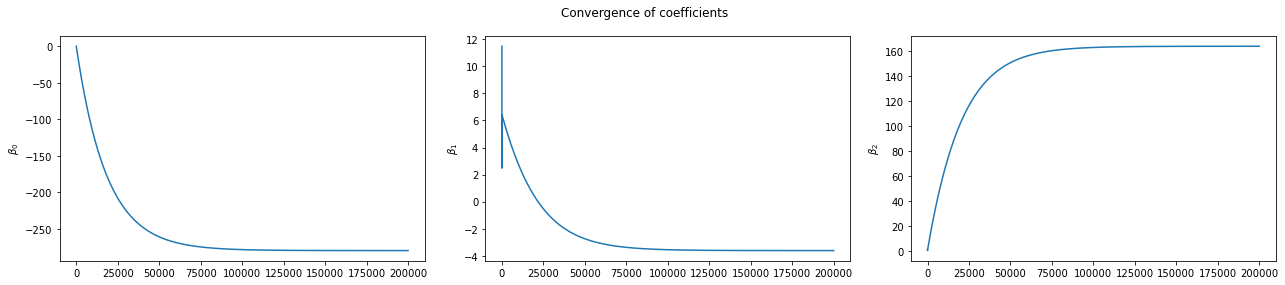

In [5]:
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharex=True)
ax[0].plot(betas[:, 0])
ax[0].set_ylabel('$\\beta_0$')
ax[1].plot(betas[:, 1])
ax[1].set_ylabel('$\\beta_1$')
ax[2].plot(betas[:, 2])
ax[2].set_ylabel('$\\beta_2$')
plt.suptitle('Convergence of coefficients')
plt.tight_layout()
plt.show()

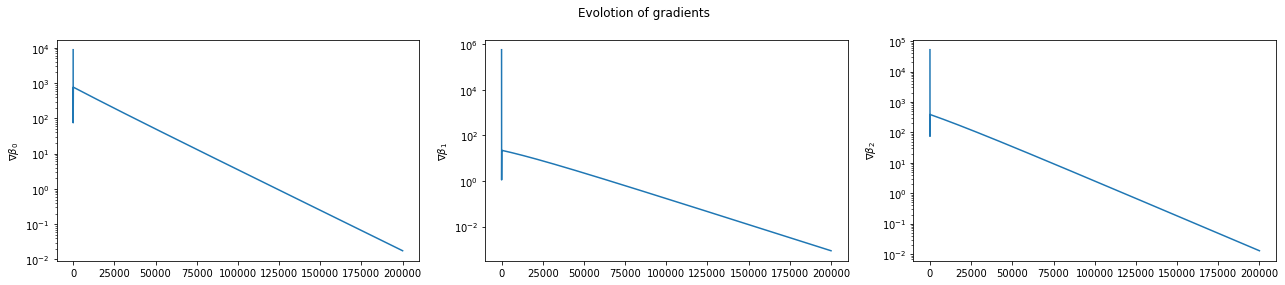

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4), sharex=True)
ax[0].plot(grads[:, 0])
ax[0].set_ylabel('$\\nabla\\beta_0$')
ax[0].set_yscale('log')
ax[1].plot(grads[:, 1])
ax[1].set_ylabel('$\\nabla\\beta_1$')
ax[1].set_yscale('log')
ax[2].plot(grads[:, 2])
ax[2].set_ylabel('$\\nabla\\beta_2$')
ax[2].set_yscale('log')
plt.suptitle('Evolotion of gradients')
plt.tight_layout()
plt.show()